## Entropy and enthalpy parameters

In this example, energy and entropy parameters will be used for structural distinction. We will consider bcc, fcc, and hcp structures to calculate the parameters.

In [1]:
import pyscal.core as pc
import pyscal.crystal_structures as pcs
import numpy as np
import matplotlib.pyplot as plt

Now we will create some structures with thermal vibrations

In [2]:
bcc_atoms, bcc_box = pcs.make_crystal('bcc', 
                    lattice_constant=3.147, 
                    repetitions=[10,10,10], noise=0.1)
bcc = pc.System()
bcc.atoms = bcc_atoms
bcc.box = bcc_box

In [3]:
fcc_atoms, fcc_box = pcs.make_crystal('fcc', 
                     lattice_constant=3.147, 
                     repetitions=[10,10,10], noise=0.1)
fcc = pc.System()
fcc.atoms = fcc_atoms
fcc.box = fcc_box

In [4]:
hcp_atoms, hcp_box = pcs.make_crystal('hcp', 
                     lattice_constant=3.147, 
                     repetitions=[10,10,10], noise=0.1)
hcp = pc.System()
hcp.atoms = hcp_atoms
hcp.box = hcp_box

The next step is to calculate the neighbors using adaptive cutoff

In [5]:
bcc.find_neighbors(method='cutoff', cutoff=0)
fcc.find_neighbors(method='cutoff', cutoff=0)
hcp.find_neighbors(method='cutoff', cutoff=0)

In order to calculate energy, a molybdenum potential is used here.

In [6]:
bcc.calculate_energy(species=['Mo'], pair_style='eam/alloy', 
                     pair_coeff='* * Mo.set Mo', mass=95,
                     averaged=True)
fcc.calculate_energy(species=['Mo'], pair_style='eam/alloy', 
                     pair_coeff='* * Mo.set Mo', mass=95,
                     averaged=True)
hcp.calculate_energy(species=['Mo'], pair_style='eam/alloy', 
                     pair_coeff='* * Mo.set Mo', mass=95,
                     averaged=True)

Now we will calculate the entropy parameters

In [7]:
latbcc = (bcc.box[0][1]-bcc.box[0][0])/10
latfcc = (fcc.box[0][1]-fcc.box[0][0])/10
lathcp = (hcp.box[0][1]-hcp.box[0][0])/10

In [8]:
bcc.calculate_entropy(1.4*latbcc, averaged=True, local=True)
fcc.calculate_entropy(1.4*latfcc, averaged=True, local=True)
hcp.calculate_entropy(1.4*lathcp, averaged=True, local=True)

Gather the values

In [9]:
bccenergy = [atom.energy for atom in bcc.atoms]
avgbccenergy = [atom.avg_energy for atom in bcc.atoms]
fccenergy = [atom.energy for atom in fcc.atoms]
avgfccenergy = [atom.avg_energy for atom in fcc.atoms]
hcpenergy = [atom.energy for atom in hcp.atoms]
avghcpenergy = [atom.avg_energy for atom in hcp.atoms]

In [10]:
bccentropy = [atom.entropy for atom in bcc.atoms]
avgbccentropy = [atom.avg_entropy for atom in bcc.atoms]
fccentropy = [atom.entropy for atom in fcc.atoms]
avgfccentropy = [atom.avg_entropy for atom in fcc.atoms]
hcpentropy = [atom.entropy for atom in hcp.atoms]
avghcpentropy = [atom.avg_entropy for atom in hcp.atoms]

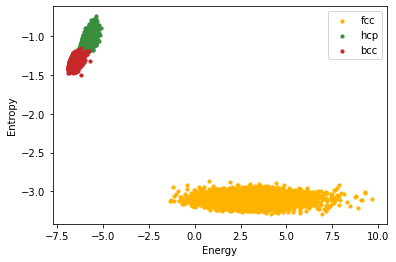

In [13]:
plt.scatter(fccenergy, fccentropy, s=10, label='fcc', color='#FFB300')
plt.scatter(hcpenergy, hcpentropy, s=10, label='hcp', color='#388E3C')
plt.scatter(bccenergy, bccentropy, s=10, label='bcc', color='#C62828')
plt.xlabel("Energy")
plt.ylabel("Entropy")
plt.legend()

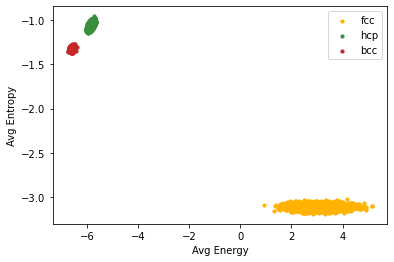

In [14]:
plt.scatter(avgfccenergy, avgfccentropy, s=10, label='fcc', color='#FFB300')
plt.scatter(avghcpenergy, avghcpentropy, s=10, label='hcp', color='#388E3C')
plt.scatter(avgbccenergy, avgbccentropy, s=10, label='bcc', color='#C62828')
plt.xlabel("Avg Energy")
plt.ylabel("Avg Entropy")
plt.legend()